# PROJECT:Abalone Case Study

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Lets create a dataframe from given csv file
df= pd.read_csv('abalone.csv')

In [3]:
#Lets see the first 5 rows of the data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#Lets check the shape of the data
df.shape


(4177, 9)

In [5]:
# Lets check the datatypes
df.dtypes 


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
# Lets get more information about the data
df.info()

# Only one categorical data Sex which is nominal rest are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


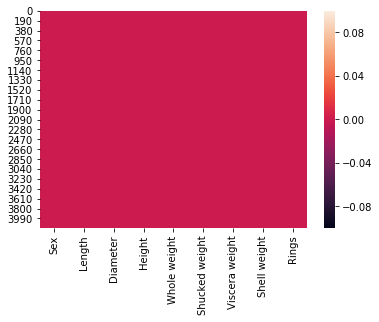

In [7]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
# Great its showing no missing values

In [8]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are no missing values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
# Lets see the descriptive statistics
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
#Lets see the correlation among the different features as well as with target
df.corr()
# we can  see there is high correlation among few variables like length,diameter,wholeweight etc

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


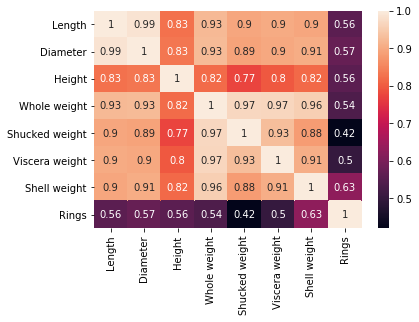

In [11]:
# lets visualize the correlation with heat map
sns.heatmap(df.corr(), annot = True)


In [12]:
# Lets see  distribution of males/females/infants
df['Sex'].value_counts()


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [13]:
# Lets create a new column named as Age as age = number of rings +1.5
df['Age'] = df['Rings'] + 1.5

In [14]:
#Lets confirm the inclusion of new column
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [15]:
# lets explore dfn
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


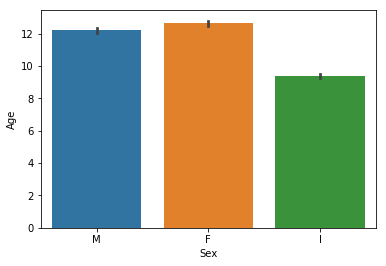

In [16]:
# Let us the see the mean age on the basis of Sex
sns.barplot(x='Sex', y ='Age', data=df)
# As expected infants have smaller mean age
# But females have more mean age than males

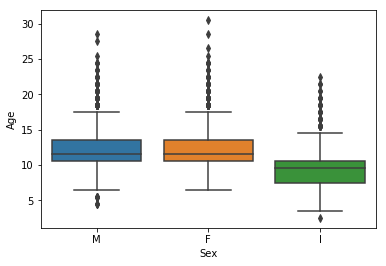

In [17]:
# Lets visualize it once more with help of box plot
sns.boxplot(x='Sex', y ='Age', data=df)

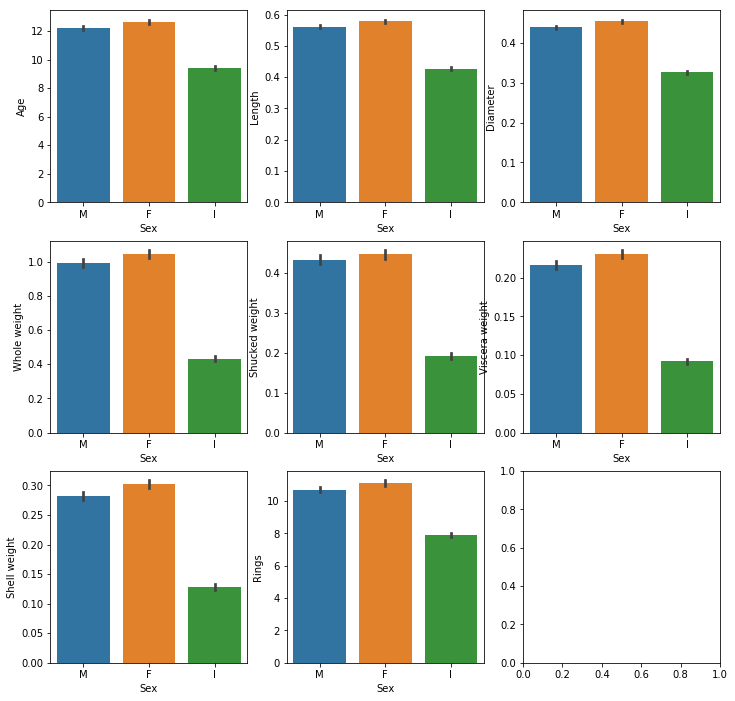

In [18]:
#Lets visualize all the numeric paramters with respect to 'Sex'
f,axes= plt.subplots(3,3, figsize=(12,12))
sns.barplot(x='Sex', y ='Age', data=df,ax=axes[0,0])
sns.barplot(x='Sex', y ='Length', data=df, ax=axes[0,1])
sns.barplot(x='Sex', y ='Diameter', data=df, ax=axes[0,2])
sns.barplot(x='Sex', y ='Whole weight', data=df, ax=axes[1,0])
sns.barplot(x='Sex', y ='Shucked weight', data=df, ax=axes[1,1])
sns.barplot(x='Sex', y ='Viscera weight', data=df, ax=axes[1,2])
sns.barplot(x='Sex', y ='Shell weight', data=df, ax=axes[2,0])
sns.barplot(x='Sex', y ='Rings', data=df, ax=axes[2,1])
# We can certainly say females are larger than males in all dimensions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007348F53B38>,
      dtype=object)

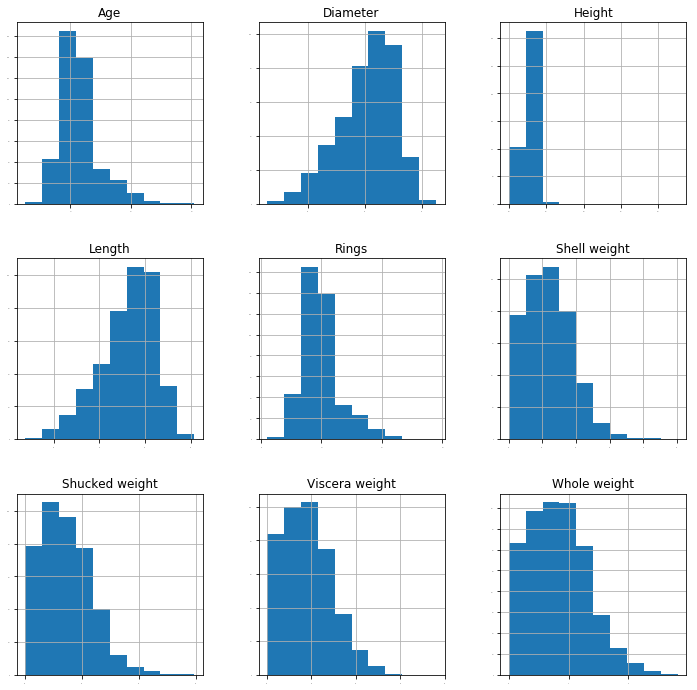

In [19]:
#Lets visualize distribution of numeric data
df.iloc[:,1:].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(12,12))
#WE CAN SEE SEVERAL VARIBALES HAVE SKEWNESS MOSTLY POSITIVELY SKEWED

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000073485FAA20>,
      dtype=object)

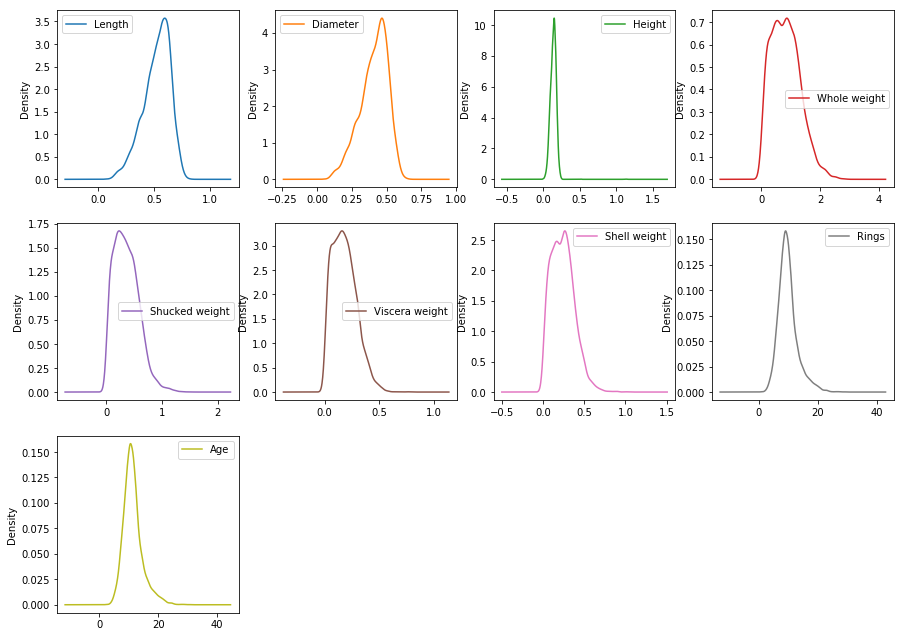

In [20]:
# # Univariate Density Plots of all numeric variables
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,15))

Length                AxesSubplot(0.125,0.71587;0.168478x0.16413)
Diameter           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Height             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Whole weight       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Shucked weight       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Viscera weight    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Shell weight      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Rings             AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Age                  AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

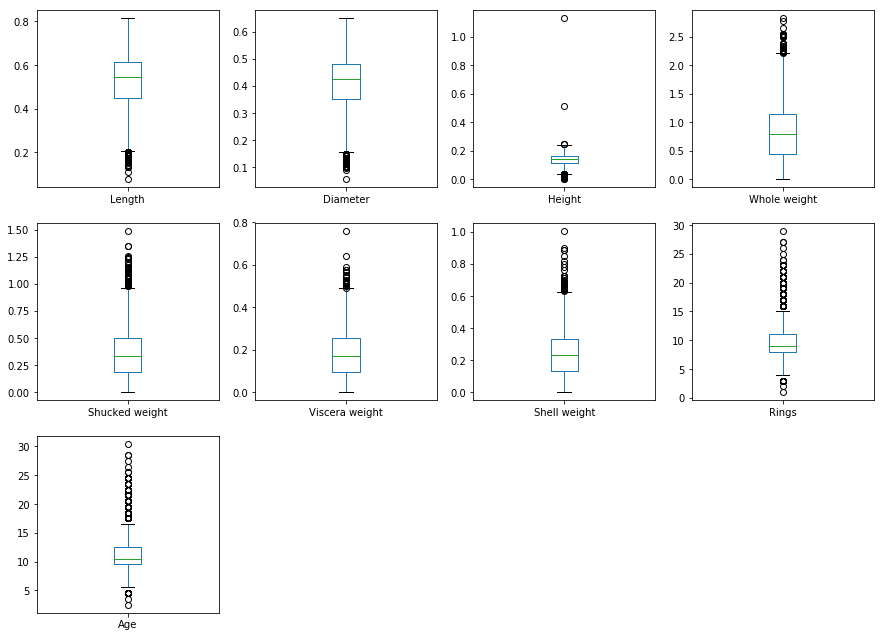

In [21]:
#Lets plot the box plot of each numeric variable
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))

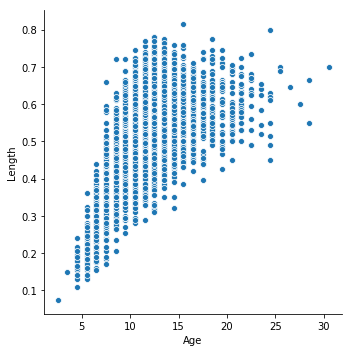

In [22]:
#Lets explore the relation with age and lenth
sns.relplot(x='Age', y ='Length', data=df)

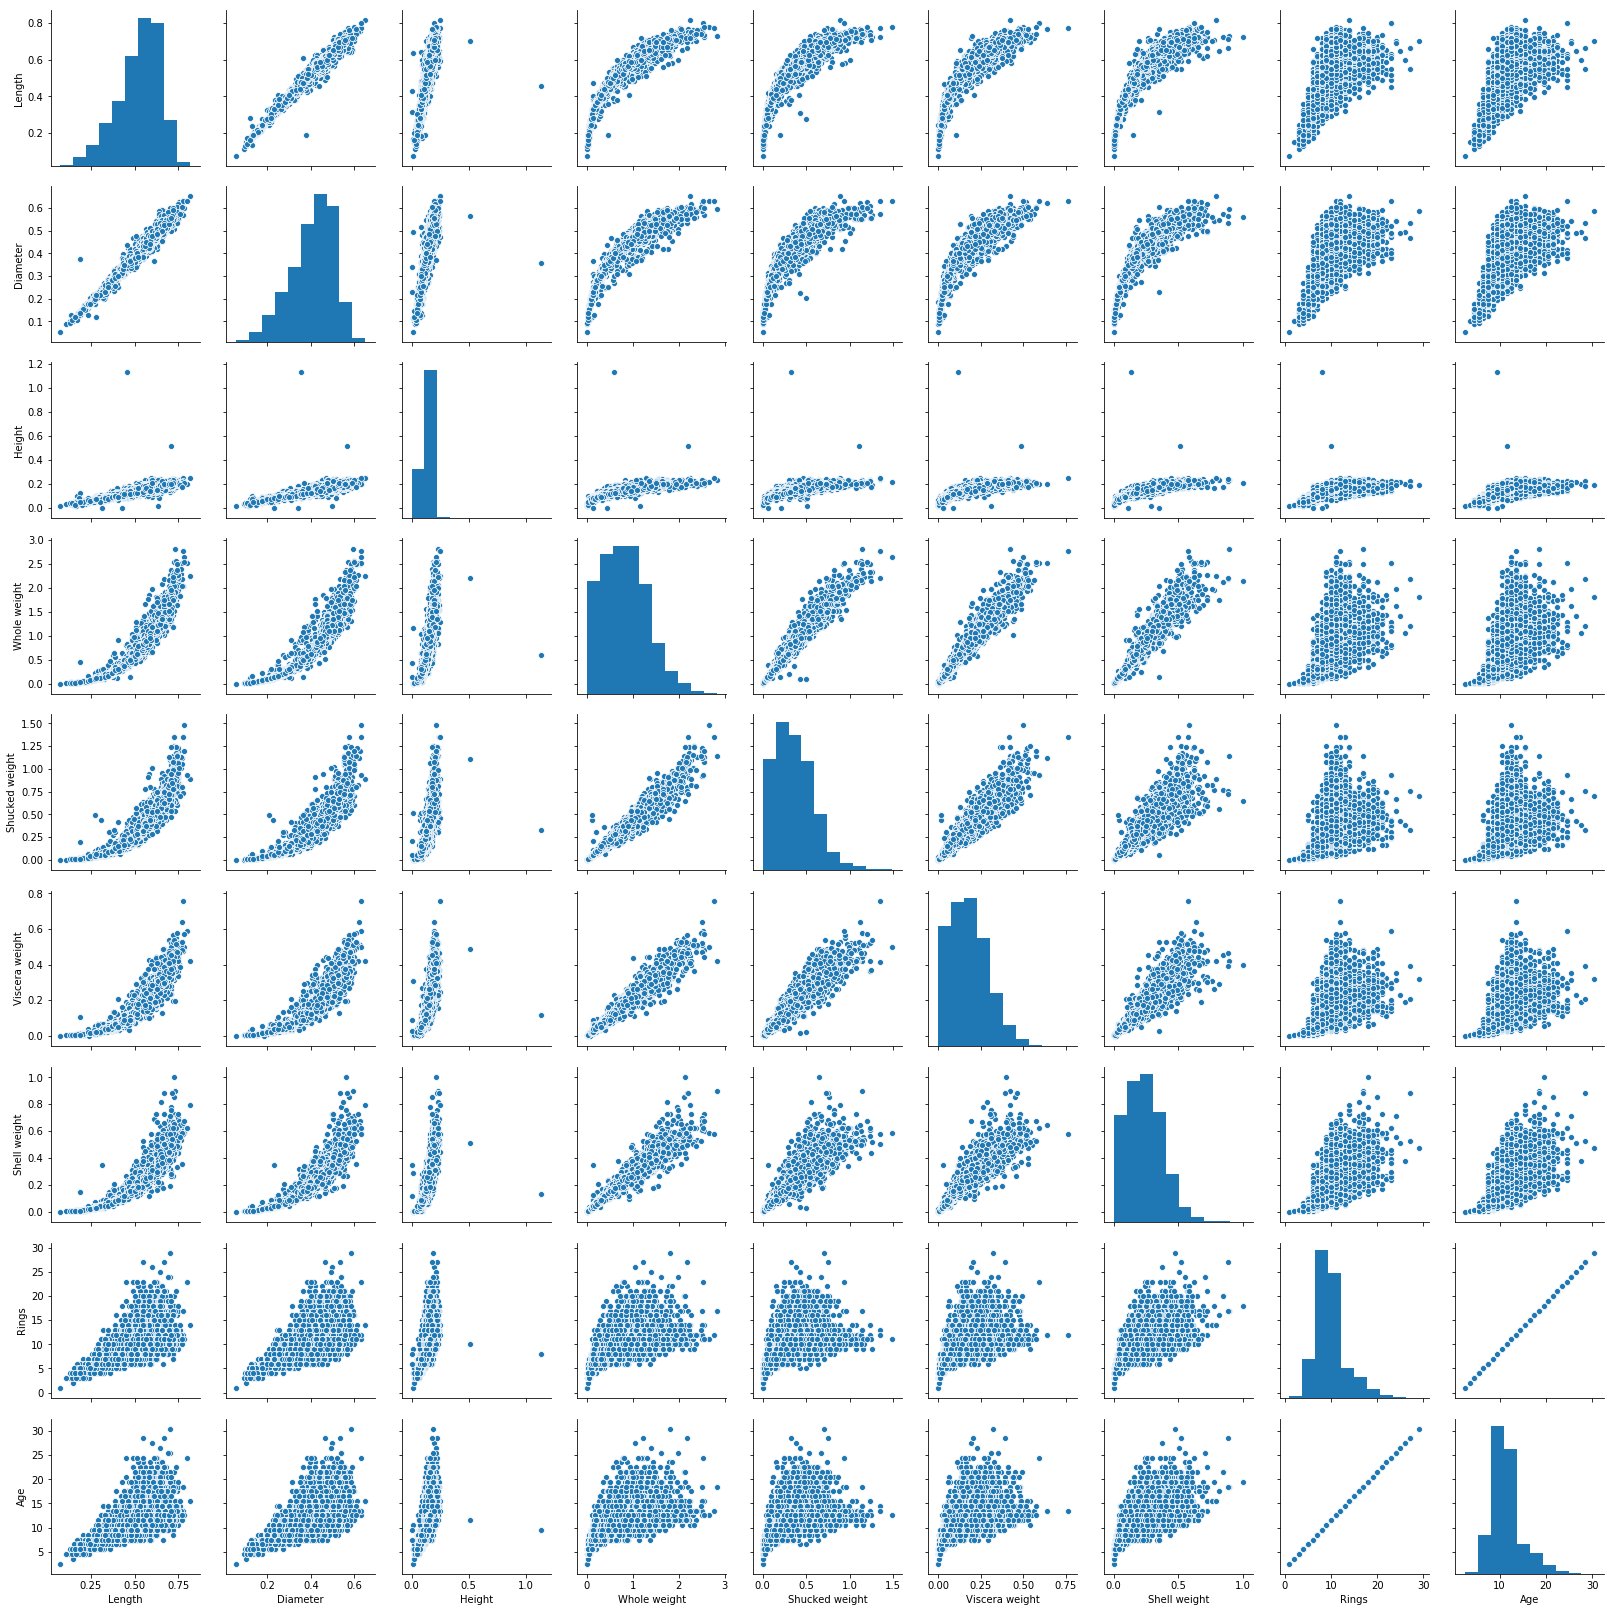

In [23]:
#Lets explore the relation between all variables
sns.pairplot(df)
# These plots also convey that several variables have high correlation

In [24]:
# As scikit learn only understand only numerics lets do on hot encoding using dummy variables
Sex = pd.get_dummies(df['Sex'],drop_first=True)

In [25]:
# As new dummy variables have been created for mentioned variables we dont need them
df.drop('Sex',axis=1,inplace=True)

In [26]:
#Lets create final dataframe
dfnew = pd.concat([df,Sex],axis=1)

In [27]:
dfnew.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,1,0


In [28]:
#Lets check the skewness of numeric data
dfnew.skew()
#there are few variables which are not in acceptable range

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
I                 0.765708
M                 0.557390
dtype: float64

In [29]:
# Let us remove the Skewness with sqrt as most of them are postively skewed
for col in dfnew.columns:                                      
    if dfnew.skew().loc[col]>0.55:
        dfnew[col]=np.power(dfnew[col],1/3)

In [30]:
#Lets check skewness in data
dfnew.skew()
# most of the skewness has been removed except few which had high skewness , lets move ahead

Length           -0.639873
Diameter         -0.609198
Height           -0.982029
Whole weight      0.530959
Shucked weight   -0.478508
Viscera weight   -0.497509
Shell weight     -0.550203
Rings             0.249669
Age               0.377228
I                 0.765708
M                 0.557390
dtype: float64

In [31]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(dfnew))
dfx = dfnew.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', dfnew.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
#there were few outliers which have been removed

The shape of original dataframe was = (4177, 11)
The shape of dataframe after removing outliers is = (4087, 11)


In [32]:
# Let us seperate the features and Target
x=dfx.drop(['Age'],axis=1)    
y=dfx[['Age']]

In [33]:
#lets see first 5 rows of x
x.head()
# x now contains only features

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,I,M
0,0.455,0.365,0.456290,0.5140,0.607769,0.465701,0.531329,2.466212,0.0,1.0
1,0.350,0.265,0.448140,0.2255,0.463384,0.364682,0.412129,1.912931,0.0,1.0
2,0.530,0.420,0.512993,0.6770,0.635374,0.521097,0.594392,2.080084,0.0,0.0
3,0.440,0.365,0.500000,0.5160,0.599537,0.484881,0.537169,2.154435,0.0,1.0
4,0.330,0.255,0.430887,0.2050,0.447309,0.340564,0.380295,1.912931,1.0,0.0


In [34]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,Age
0,2.545822
1,2.040828
2,2.189760
3,2.257179
4,2.040828


In [35]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [36]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso())])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))




In [37]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [38]:
#
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2') 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.999658 (0.000128)
Lasso: -0.211136 (0.213443)
Ridge: 0.999660 (0.000124)
EN: -0.211136 (0.213443)
DT: 1.000000 (0.000000)
SVR: 0.947478 (0.022447)
KNN: 0.979292 (0.005446)


In [39]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -0.000010 (0.000004)
Lasso: -0.037887 (0.016223)
Ridge: -0.000010 (0.000004)
EN: -0.037887 (0.016223)
DT: -0.000000 (0.000000)
SVR: -0.001389 (0.000175)
KNN: -0.000626 (0.000292)


In [40]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
ensemble = [('RF', RandomForestRegressor(random_state=5)),('ADR',AdaBoostRegressor(random_state=5)),('GBR',GradientBoostingRegressor(random_state=5))]
results2 = []
names2 = []
for name, model in ensemble: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, x, y, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)                                              


RF: -0.000000 (0.000000)
ADR: -0.000933 (0.000200)
GBR: -0.000000 (0.000000)


In [41]:
#lets  check the r2 score of these ensemble techniques
results3 = []
names3 = []
for name, model in ensemble: 
    kfold3 = KFold(n_splits=10, random_state=1) 
    cv_results3 = cross_val_score(model, x, y, cv=kfold3, scoring='r2') 
    results3.append(cv_results3) 
    names3.append(name) 
    msg3 = "%s: %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg3) 

RF: 1.000000 (0.000000)
ADR: 0.966393 (0.012658)
GBR: 0.999997 (0.000001)


In [42]:
# Great to see RF AND DT ARE giving CROSS VAL r2 score of 1 and nmse of 0
# So either we can choose RF or DT
# We will prefer DT for its less complex model
# Simpler models are less resource hungry

In [43]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [44]:
#Lets find out the best random state for selected decision tree regressor
# scaled features are not neccesary for distance based algo

max_r2=0
dt= DecisionTreeRegressor(random_state=5)
for i in range(10,80):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    dt.fit(X_train,y_train)
    ypreds=dt.predict(X_test)
    r2_scr=r2_score(y_test, ypreds)
    print('At random state ', i, 'the value of r2_score is ', r2_scr)
    if r2_scr>max_r2:
        max_r2=r2_scr
        finalstate=i
print()
print()
print('max r2 score is', max_r2,'at random state' , finalstate)

At random state  10 the value of r2_score is  1.0
At random state  11 the value of r2_score is  1.0
At random state  12 the value of r2_score is  1.0
At random state  13 the value of r2_score is  1.0
At random state  14 the value of r2_score is  1.0
At random state  15 the value of r2_score is  1.0
At random state  16 the value of r2_score is  1.0
At random state  17 the value of r2_score is  1.0
At random state  18 the value of r2_score is  1.0
At random state  19 the value of r2_score is  1.0
At random state  20 the value of r2_score is  1.0
At random state  21 the value of r2_score is  1.0
At random state  22 the value of r2_score is  1.0
At random state  23 the value of r2_score is  1.0
At random state  24 the value of r2_score is  1.0
At random state  25 the value of r2_score is  1.0
At random state  26 the value of r2_score is  1.0
At random state  27 the value of r2_score is  1.0
At random state  28 the value of r2_score is  1.0
At random state  29 the value of r2_score is  1.0


In [45]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 10)
dtr= DecisionTreeRegressor(random_state=5)
dtr.fit(X_train,y_train)
ypred=dtr.predict(X_test)
r2_scr=r2_score(y_test, ypred)
mse=mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
mae= mean_absolute_error(y_test, ypred)
print('r2_score is', r2_scr)
print('mse is', mse)
print('rmse is', rmse)
print('mae is', mae)

r2_score is 1.0
mse is 2.6846043228006903e-29
rmse is 5.181316746542996e-15
mae is 4.400446320830908e-15


In [46]:
#Lets once again verify its r2 cross val score
kfoldx = KFold(n_splits=10, random_state=1)
cross_val_score(DecisionTreeRegressor(random_state=5),x,y,cv=kfoldx,scoring="r2").mean()

1.0

In [47]:
#Lets once again verify its neg mean square error  cross val score
kfoldx = KFold(n_splits=10, random_state=1)
cross_val_score(DecisionTreeRegressor(random_state=5),x,y,cv=kfoldx,scoring="neg_mean_squared_error").mean()


-8.084486570916118e-29

Awesome we reconfirmed there cross val for r2 and negative mse

In [48]:
# Lets save the predicted result to a csv file
dfx = pd.DataFrame(ypred)
dfx.to_csv('dtr_abalone_prediction.csv')

In [49]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(dtr,'DT_abalone.pkl')

['DT_abalone.pkl']